a)
Det elektriske feltet er 0 i origo, det er fordi linjeladningstettheten er uniform og bidragene fra hver av linjene vil kansellere hverandre. Kan ikke si så mye om potensialet siden det elektriske feltet kun er 0 i origo.

b) For en enkelt linje vil potensialet være gitt ved
$$V_l = \int^a_{-a} \frac{\rho_l dl}{4 \pi \epsilon_0 } \frac{1}{R}$$ 
Hver linje har ladning 
$$ Q_l = \frac{Q}{4}
$$
og linjeladningstetthet 
$$\rho_l = \frac{Q_l}{L} = \frac{Q}{8a}$$
$$\textbf{R} = \textbf{r} - \textbf{r'} = (0,0,z) - (x,y,0) = (-x,-y,z)$$
$$R = \sqrt{x^2+y^2+z^2}$$
Setter inn i integralet, hva vi integrerer over kommer ann på hvilken av linjene vi finner potensialet til, integrerer bare over en av linjene og tar superposisjonsprinsippet siden resultatet av integralet blir det samme for alle linjene.
$$V_l = \int^a_{-a} \frac{Q }{32 \pi \epsilon_0 a} \frac{1}{\sqrt{x^2+y^2+z^2}} dx$$ 
$$V_l = \frac{Q }{32 \pi \epsilon_0 a} \int^a_{-a}  \frac{1}{\sqrt{x^2+y^2+z^2}} dx$$ 
Denne linjen ligger langs y-aksen og vil y vil være en konstant a, setter $$c = \sqrt{y^2+z^2}$$
$$V_l = \frac{Q }{32 \pi \epsilon_0 a} \int^a_{-a}  \frac{1}{\sqrt{x^2+c^2}} dx$$ 
$$V_l = \frac{Q }{32 \pi \epsilon_0 a} [ arcsinh(\frac{x}{c}) ]^a_{-a} $$
$$V_l = \frac{Q }{16 \pi \epsilon_0 a}  arcsinh(\frac{a}{\sqrt{a^2+z^2}})  $$
Siden vi har fire linjer ganger vi med fire og får
$$V(z) = \frac{Q }{4 \pi \epsilon_0 a}  arcsinh(\frac{a}{\sqrt{a^2+z^2}})  $$






(-5.0, 5.0, -5.0, 5.0)

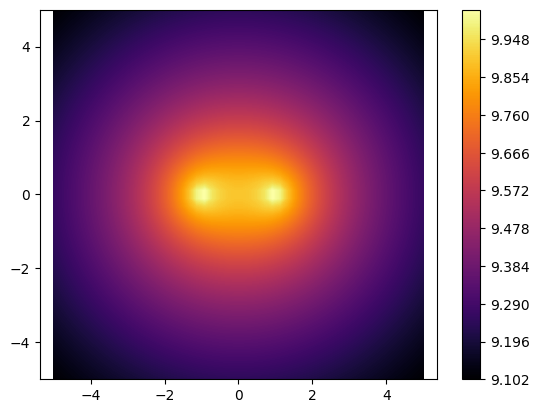

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0

def epotlist(r,Q,R):
    V=0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V += qi/(16*np.pi*epsilon_0*Rinorm)
    return V
    
def findpot(N, L, Q_l, z_l):
    Q = []
    R1 = []
    R2 = []
    R3 = []
    R4 = []
    a = L/2
    rho_l = Q_l/N
    lp = np.linspace(-a, a, N)
    z = 0
    for i in range(N):
        R1.append(np.array([lp[i], a, z_l]))
        R2.append(np.array([lp[i], -a, z_l]))
        R3.append(np.array([a, lp[i], z_l]))
        R4.append(np.array([-a, lp[i], z_l]))
        Q.append(rho_l)
    Lx = 5
    Ly = 5
    Lz = 5
    x = np.linspace(-Lx,Lx,N)
    y = np.linspace(-Ly,Ly,N)
    z = np.linspace(-Lz,Lz,N)
    rx = np.meshgrid(x,x)[0]
    ry, rz = np.meshgrid(y,z)
    V = np.zeros((N,N),float)
    for i in range(len(ry.flat)):
        r = np.array([z_l , ry.flat[i], rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R1) + epotlist(r,Q,R2) + epotlist(r,Q,R3) + epotlist(r,Q,R4)
    return rx, ry, rz, Q, V
    
Q_l = 1
a = 1
N = 50
L = 2*a
z = 0
rx, ry, rz, Q, V = findpot(N, L, Q_l, z)
Q_tot = sum(Q) * 4

plt.contourf(ry,rz,np.log10(V), levels = 500, cmap = "inferno")
plt.colorbar()
plt.axis("equal")


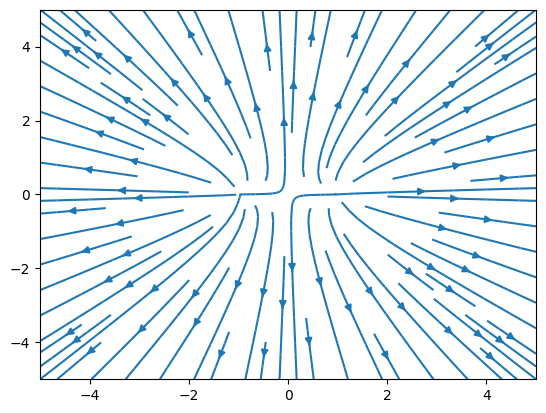

In [221]:
plt.streamplot(ry, rz, -np.gradient(V)[1], -np.gradient(V)[0])

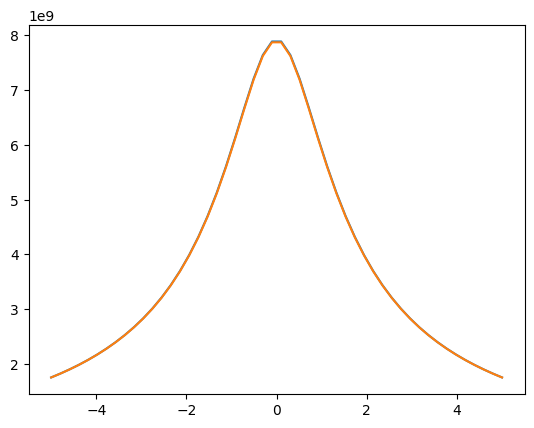

In [222]:
def analytisk(z):
    return Q_tot/(16*np.pi*epsilon_0*a)*np.arcsinh(a/np.sqrt(a**2 + z**2))


z = np.linspace(-5,5, N)
plt.plot(z, analytisk(z))
plt.plot(z, V[:,int(N/2)])


$$V_1 = \frac{Q }{4 \pi \epsilon_0 a}  arcsinh(\frac{a}{\sqrt{a^2+z^2}})  $$
$$V_2 = \frac{-Q }{4 \pi \epsilon_0 a}  arcsinh(\frac{a}{\sqrt{a^2+(2a-z)^2}})  $$
$$V_2 = \frac{-Q }{4 \pi \epsilon_0 a}  arcsinh(\frac{a}{\sqrt{5a^2-4az+z^2}})  $$
$$V = V_1+V_2$$
$$V = \frac{Q }{4 \pi \epsilon_0 a} (arcsinh(\frac{a}{\sqrt{a^2+z^2}}) - arcsinh(\frac{a}{\sqrt{5a^2-4az+z^2}}))  $$
$$V(0) = \frac{Q }{4 \pi \epsilon_0 a} (arcsinh(\frac{a}{\sqrt{a^2+0^2}}) - arcsinh(\frac{a}{\sqrt{5a^2-4a\cdot 0+0^2}}))  $$
$$V(0) = \frac{Q }{4 \pi \epsilon_0 a} (arcsinh(1) - arcsinh(\frac{1}{\sqrt{5}}))  $$
$$V(2a) = \frac{Q }{4 \pi \epsilon_0 a} (arcsinh(\frac{a}{\sqrt{a^2+(2a)^2}}) - arcsinh(\frac{a}{\sqrt{5a^2-4a\cdot 2a+(2a)^2}}))  $$
$$V(2a) = \frac{Q }{4 \pi \epsilon_0 a} (arcsinh(\frac{1}{\sqrt{5}}) - arcsinh(1))  $$
$$V(0) - V(2a)$$
$$\frac{Q }{4 \pi \epsilon_0 a} (arcsinh(1) - arcsinh(\frac{1}{\sqrt{5}})) - \frac{Q }{4 \pi \epsilon_0 a} (arcsinh(\frac{1}{\sqrt{5}}) - arcsinh(1))  $$
$$\frac{Q }{4 \pi \epsilon_0 a} (arcsinh(1) - arcsinh(\frac{1}{\sqrt{5}}) - arcsinh(\frac{1}{\sqrt{5}}) + arcsinh(1))  $$
$$\frac{Q }{2 \pi \epsilon_0 a} (arcsinh(1) - arcsinh(\frac{1}{\sqrt{5}}))$$

In [223]:
z = 2*a
rx, ry, rz, Q2, V2 = findpot(N, L, -Q_l, z)

Q2_tot =  sum(Q2)*4
delV = 2*(V[int(0)][int(N/2)] + V2[int(0)][int(N/2)])

analytisk2 = Q_tot/(2*np.pi*epsilon_0*a)*(np.arcsinh(1)-np.arcsinh(1/np.sqrt(5)))

print(delV)
print((Q_tot+Q2_tot)/delV)



1060040235.7624068
0.0


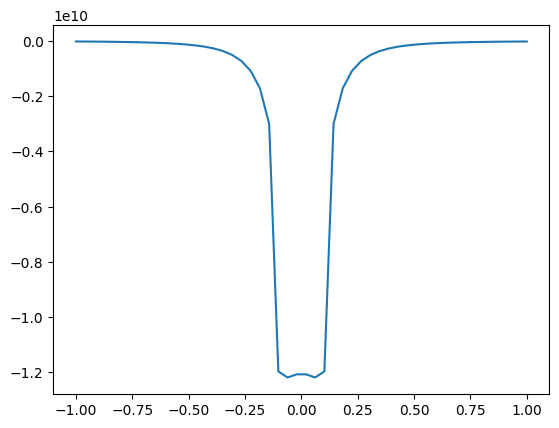

In [224]:

Q = []
R1 = []
R2 = []
R3 = []
R4 = []
R5 = []
R6 = []
R7 = []
R8 = []
a = L/2
rho_l = Q_l/N
lp = np.linspace(-a, a, N)
for i in range(N):
    z_l = 0
    R1.append(np.array([lp[i], a, z_l]))
    R2.append(np.array([lp[i], -a, z_l]))
    R3.append(np.array([a, lp[i], z_l]))
    R4.append(np.array([-a, lp[i], z_l]))
    Q.append(rho_l)
    z_l = 2*a
    R5.append(np.array([lp[i], a, z_l]))
    R6.append(np.array([lp[i], -a, z_l]))
    R7.append(np.array([a, lp[i], z_l]))
    R8.append(np.array([-a, lp[i], z_l]))
    Q2.append(-rho_l)
Lx = 10
Ly = 10
Lz = 10
x = np.linspace(-Lx,Lx,N)
y = np.linspace(-Ly,Ly,N)
z = np.linspace(-Lz,Lz,N)
rx = np.meshgrid(x,y)[0]
ry, rz = np.meshgrid(y,z)
V3 = np.zeros((N),float)
for i in range((N)):
    r = np.array([rx.flat[i] , a, 2*a])
    V3.flat[i] = epotlist(r,Q,R1) + epotlist(r,Q,R2) + epotlist(r,Q,R3) + epotlist(r,Q,R4) + epotlist(r,Q2,R5) + epotlist(r,Q2,R6) + epotlist(r,Q2,R7) + epotlist(r,Q2,R8)
plt.plot(lp, V3)